## Preliminary analysis

- Includes viewing the sheet, analyzing the columns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_excel('merged_data.xlsx')

In [4]:
dataset.head()

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,...,67,768,191,2060,*,3 or fewer,*,2060,*,*


In [7]:
# Attributes datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3134 non-null   int64  
 1   State              3134 non-null   object 
 2   AreaName           3134 non-null   object 
 3   All_Poverty        3134 non-null   int64  
 4   M_Poverty          3134 non-null   int64  
 5   F_Poverty          3134 non-null   int64  
 6   FIPS               3134 non-null   int64  
 7   Med_Income         3133 non-null   float64
 8   Med_Income_White   3132 non-null   float64
 9   Med_Income_Black   1924 non-null   float64
 10  Med_Income_Nat_Am  1474 non-null   float64
 11  Med_Income_Asian   1377 non-null   float64
 12  Hispanic           2453 non-null   float64
 13  M_With             3134 non-null   int64  
 14  M_Without          3134 non-null   int64  
 15  F_With             3134 non-null   int64  
 16  F_Without          3134 

In [8]:
# Number of null entries, excludes special missing entries such as *, _ and __
len(dataset) - dataset.count()

Unnamed: 0              0
State                   0
AreaName                0
All_Poverty             0
M_Poverty               0
F_Poverty               0
FIPS                    0
Med_Income              1
Med_Income_White        2
Med_Income_Black     1210
Med_Income_Nat_Am    1660
Med_Income_Asian     1757
Hispanic              681
M_With                  0
M_Without               0
F_With                  0
F_Without               0
All_With                0
All_Without             0
fips_x                  0
Incidence_Rate          0
Avg_Ann_Incidence       0
recent_trend            0
fips_y                  0
Mortality_Rate          0
Avg_Ann_Deaths          0
dtype: int64

Here you could see the number of null values present in each attribute. Note that few features like Incidence rates, Avg_Ann_Incidence have missing values but since they are encoded differently, the below table shows zero counts for these.

Key Observation:
- The Median Income of Ethnicities have a lot of missing datas (More than 38% for 3 ethnicities, 20% for Hispanic)


## Visualizing the Dataset

- Let's visualize the dataset to understand it better

In [9]:
# let's create a copy and work on it further
cancer = dataset.copy()

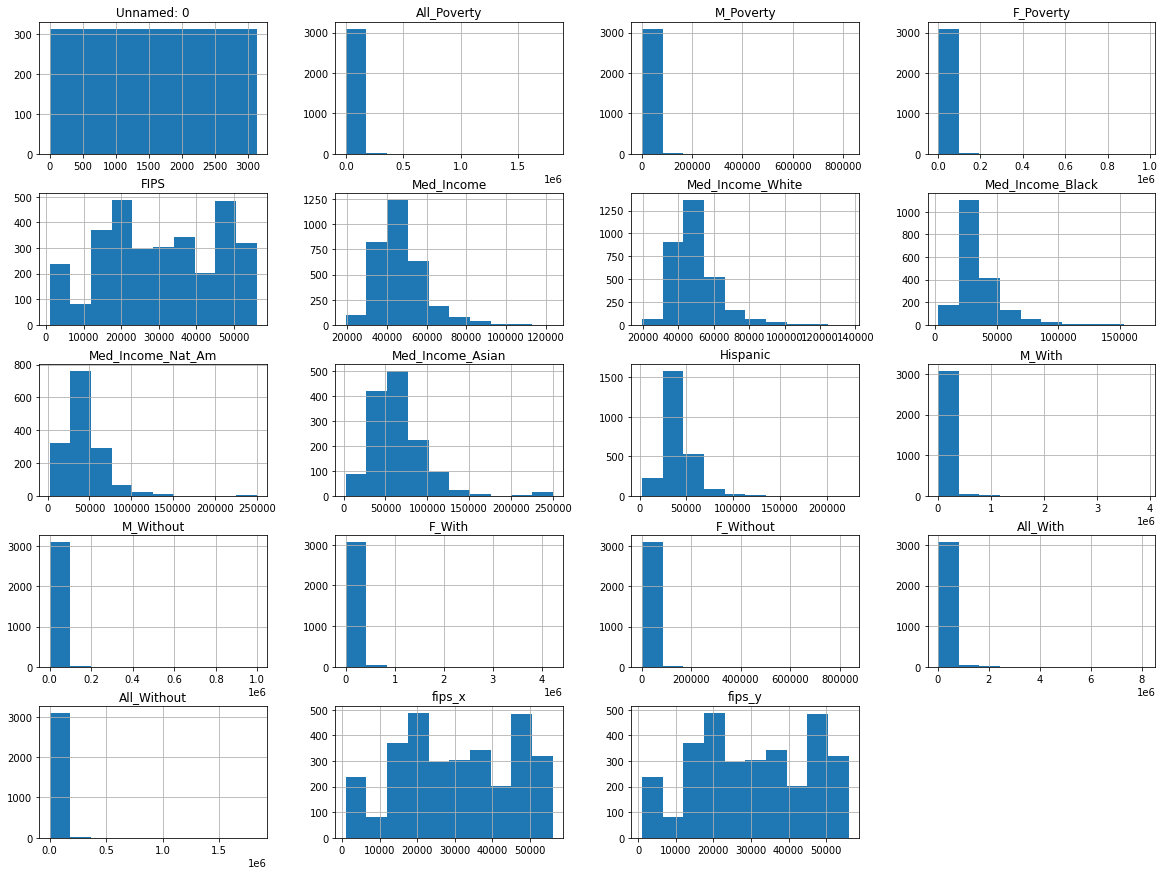

In [10]:
cancer.hist(figsize = (20,15))
plt.show()

Instead of dropping data here and then, let's make inferences and finally make a overall pipeline

**Initial Observation**:
- From the sheet, it is clear that "unnamed 0" is additional index. We must drop that.
- Similarly, Area name and State column should be dropped as it is primarily present to make searching easier

In [11]:
# Analysing Poverty features
print("Is All_Poverty equal to M_Poverty + F_Poverty:" , not sum(cancer['All_Poverty']!=(cancer['M_Poverty'] + cancer['F_Poverty'])),'\n')
corr_matrix = cancer.corr()
print('Collinearity: ')
print(corr_matrix['All_Poverty'][['All_Poverty','M_Poverty','F_Poverty']])

Is All_Poverty equal to M_Poverty + F_Poverty: True 

Collinearity: 
All_Poverty    1.000000
M_Poverty      0.999696
F_Poverty      0.999792
Name: All_Poverty, dtype: float64


All_Poverty, M_Poverty, F_Poverty are highly correlated and also All_Poverty is sum of M_Poverty and F_Poverty. 

Let's Analyse FIPS (Federal Information Processing Standards). It is a unique identifier for each county. Let's verify this claim and also check if there's any relationship between fips, fips_x and fips_y

In [12]:
print('No of records:', len(cancer))
print('No of unique FIPS values:', cancer['FIPS'].nunique(),'\n')
print('Collinearity: ')
print(corr_matrix['FIPS'][['FIPS','fips_x','fips_y']])
print('Is FIPS, fips_x, fips_y identical? ', not (len(cancer) - sum(cancer['FIPS']==cancer['fips_x']) and len(cancer) - sum(cancer['FIPS']==cancer['fips_y']) ))

No of records: 3134
No of unique FIPS values: 3134 

Collinearity: 
FIPS      1.0
fips_x    1.0
fips_y    1.0
Name: FIPS, dtype: float64
Is FIPS, fips_x, fips_y identical?  True


Since all the three attributes are equal and are only indicative of indexes,
FIPS,fips_x, fips_y should be dropped.

Now, let's analyse Median Income and ethnicities

In [13]:
## Missing Values and collinearity with each other ethnicities
a_ = len(cancer) - cancer.count()
print(a_[['Med_Income','Med_Income_White','Med_Income_Black','Med_Income_Nat_Am','Med_Income_Asian','Hispanic']],'\n')
print('Collinearity: ')
print(corr_matrix['Med_Income'][['Med_Income','Med_Income_White','Med_Income_Black','Med_Income_Nat_Am','Med_Income_Asian','Hispanic']])

Med_Income              1
Med_Income_White        2
Med_Income_Black     1210
Med_Income_Nat_Am    1660
Med_Income_Asian     1757
Hispanic              681
dtype: int64 

Collinearity: 
Med_Income           1.000000
Med_Income_White     0.935495
Med_Income_Black     0.591432
Med_Income_Nat_Am    0.349509
Med_Income_Asian     0.320073
Hispanic             0.479943
Name: Med_Income, dtype: float64


Now, Let's analyse Population Health Insurance Attributes

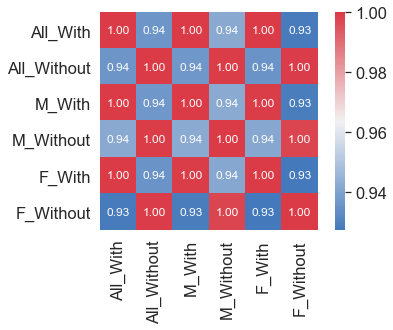

In [13]:
cols = ['All_With','All_Without','M_With','M_Without','F_With','F_Without']
sns.set_style(style = 'white')
cmap = sns.diverging_palette(250, 10, as_cmap=True)
cm = cancer[cols].corr()
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cmap = cmap,cbar=True, annot=True, square=True,fmt='.2f', annot_kws={'size':12},
                 yticklabels=cols, xticklabels=cols)
plt.show()

This indicates these columns are highly correlated. Notice that All_With yields almost 1 correlation to M_with and F_with and All_Without yields near 1 correlation with M_Without and F_Without. This makes sense as Total Population with Insurance in a way is highly related to Male and Female Populations who have insurance.

#### Investigating incidence_rate,avg_ann_incidence, mortality, avg_ann_death

In [14]:
# checks whether a particular column has integer entries and returns the number of non-int entries
def checkint(df, column):
    errorvals = []
    for val in df[column]:
        try:
            float(val)
        except:
            errorvals.append(val)
    print('\nFor the column ',column,', non-numeric entries are: ')
    print(pd.Series(errorvals).value_counts(),'\n')
        

In [15]:
checkint(cancer,'Incidence_Rate')
checkint(cancer,'Avg_Ann_Incidence')
checkint(cancer,'Mortality_Rate')
checkint(cancer,'Avg_Ann_Deaths')


For the column  Incidence_Rate , non-numeric entries are: 
*         211
_         192
__         17
71.1 #      2
73.6 #      2
         ... 
63.8 #      1
54.6 #      1
51.2 #      1
60 #        1
50.1 #      1
Length: 79, dtype: int64 


For the column  Avg_Ann_Incidence , non-numeric entries are: 
3 or fewer    211
_             192
__             17
dtype: int64 


For the column  Mortality_Rate , non-numeric entries are: 
*    325
dtype: int64 


For the column  Avg_Ann_Deaths , non-numeric entries are: 
*    325
dtype: int64 



- ' * ' represents missing data
- ' # ' is representative of some legislature rules and 
- _ and __ are suppressed data due to rules and regulations .

We will deal these missing values by considering the entries only with known entries. Rows containing '#' appended to numbers can safely be considered as the error attributed due to legislative rules would be insignificant. * 's and underscores entries will be dealt by ignoring them

<u>**Mortality Rate**</u>

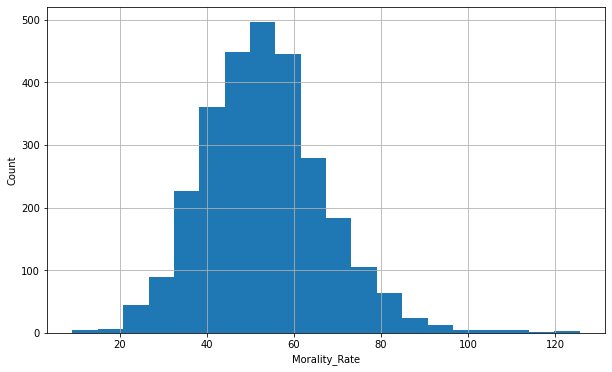

In [16]:
cancer['Mortality_Rate'][cancer['Mortality_Rate']!='*'].hist(bins=20,figsize = (10,6))
plt.xlabel("Morality_Rate")
plt.ylabel("Count")
plt.show()

In [17]:
print("Range: ")
print('min: ',cancer['Mortality_Rate'][cancer['Mortality_Rate']!='*'].min())
print('max: ',cancer['Mortality_Rate'][cancer['Mortality_Rate']!='*'].max())

Range: 
min:  9.2
max:  125.6


- Mortality Rate is our target variable. There appears some missing values * in the particular attribute. This needs to addressed
- From cancer_data_notes.xlsx, * indicates counts are suppressed if fewer than 16 records are reported (or)  Data has been suppressed to ensure confidentiality and stability of rate estimates

The following are the choices:
- Impute the values (use strategies such as median or mean) to fill the missing data. Mean or Median aren't good choices as they are arbitary here. Also, filling the values with 16 or lower isn't possible because the mortality_rates' are population adjusted (per 100,000) which information isn't available to us. So, the adjusted rate may vary anywhere depending upon the population. 
- Also, if the lesser count is an indication of unreported cases (which is a lot more likely), it is better to drop those columns (as this accounts for unnecessary noises)

Final Decision: Drop the specific rows containing *'s as the population is unknown, data have some uncertainity and since this is a target variable

In [18]:
cancer_new = cancer[cancer['Mortality_Rate']!='*']

<u>**Incidence_Rate**</u>

In [19]:
checkint(cancer_new,'Incidence_Rate')


For the column  Incidence_Rate , non-numeric entries are: 
_         151
__         12
*           5
71.1 #      2
73.6 #      2
         ... 
54.6 #      1
51.2 #      1
60 #        1
60.7 #      1
50.1 #      1
Length: 79, dtype: int64 



### Recent Trend

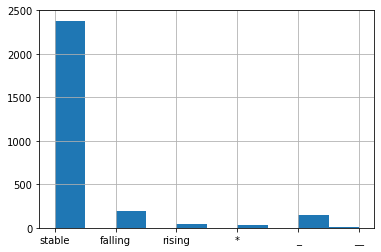

In [20]:
cancer_new['recent_trend'].hist()
plt.show()

In [21]:
cancer_new['recent_trend'].value_counts()

stable     2382
falling     197
_           151
rising       39
*            28
__           12
Name: recent_trend, dtype: int64

Recent Trend is a categorical data which describes the trend over past 5 years on Incidence of Cancer. Though it is suggestive of likelihood of cancer, it is definitely not a clear indicator of Cancer Incidence. Trend depends on various external factors and can't be analyzed further without additional information. This data is from 2017 and before. (Some thoughts: It is intruiging to think about the current trend due to pandemic and Economy to impact these columns). So, it is dropped from further analysis.  

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

In [23]:
# Few Transformers 

# if drop = False, it selects cols. if drop = True, it drops those cols and returns everything else.
# selects particular columns of a dataframe
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names,drop=False):
        self.attribute_names = attribute_names 
        self.drop = drop
    def fit(self,X,y=None):
        return self # does Nothing 
    def transform(self,X):
        if self.drop:
            X_ = X.drop(self.attribute_names,axis=1)
            return X_ 
            # change it to X_.values later 
        else:
            return X[self.attribute_names].values
    

In [24]:
# removes rows containing special missing vals 
class rowremover(BaseEstimator,TransformerMixin):
    def __init__(self,col,string):
        self.string = string 
        self.col = col
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[X[self.col]!=self.string]        

In [25]:
# retrieves the number that has '#' appended to its end
import regex 
class hashappendfixer(BaseEstimator,TransformerMixin):
    def __init__(self,col):
        self.col = col 
    def fit(self,X,y=None):
        return self 
    def transform(self,X,y=None):
        X[self.col] = X[self.col].replace({'\#':''}, regex = True)
        return X

In [26]:
# converts non-convertible non integer values to Nan. Useful to convert *, _ and __ to Nan
class missingvaluefixer(BaseEstimator,TransformerMixin):
    def __init__(self,col):
        self.col = col
    def fit(self,X,y=None):
        return self 
    def transform(self,X,y=None):
        X[self.col] = pd.to_numeric(X[self.col], errors='coerce')
        return X
            

In [27]:
# creates a new column on poverty percentage which is number of people living under poverty/(estimated population in county)
# estimated population = 10^6 *'Ann_Incidence_Rate'/'Incidence_Rate'
# Reason: Incidence_rate is normalized values (for a million population) and Ann_Incidence is the total count
def povertypercentage(df,col=['All_Poverty','M_Poverty','F_Poverty']):
    for col_name in col:
        df[col_name+'_Percentage'] = 100*df[col_name]/(100000*df['Avg_Ann_Incidence']/df['Incidence_Rate'])
    return df 

# creates a new column on Insurance percentage which is number of people with insurance /(estimated population in county)
# estimated population = Total People with insurance and Total People without insurance
# Both the ways of estimating population yields similar numbers (Results not shown). Different approaches are adopted to 
# ensure more accurate results and takes information in accordance to the calculations.
def HealthInsurancePercentage(df,col=['M_With','F_With','All_With']):
    for col_name in col:
        df[col_name+'_Percentage'] = 100*df[col_name]/(df['All_With']+df['All_Without'])
    
    return df

In [28]:
from sklearn.pipeline import Pipeline

dropcols = ['Unnamed: 0','State','AreaName','FIPS','fips_x','fips_y','Avg_Ann_Deaths','recent_trend']
pipeline = Pipeline([('selector',DataFrameSelector(dropcols,drop=True)),
                    ('starremover',rowremover('Mortality_Rate','*')),('hashfixer',hashappendfixer('Incidence_Rate')),
                    ('starremover_',rowremover('Incidence_Rate','*')),('underscoreremover',rowremover('Incidence_Rate','_')),
                    ('doubleunderscoreremover',rowremover('Incidence_Rate','__'))])

In [29]:
pipeline.fit(dataset) 
train_set_prepared = pipeline.transform(dataset)
train_set_prepared.reset_index(drop = True, inplace = True)
train_set_prepared["Mortality_Rate"] = pd.to_numeric(train_set_prepared["Mortality_Rate"])
train_set_prepared["Incidence_Rate"] = pd.to_numeric(train_set_prepared["Incidence_Rate"])
train_set_prepared["Avg_Ann_Incidence"] = pd.to_numeric(train_set_prepared["Avg_Ann_Incidence"])
train_set_prepared = povertypercentage(train_set_prepared)
train_set_prepared = HealthInsurancePercentage(train_set_prepared)

In [30]:
dataset_prepared = train_set_prepared.drop(['All_Poverty','M_Poverty','F_Poverty','M_With','M_Without'
                                           ,'F_With','F_Without','All_With','All_Without','Avg_Ann_Incidence'],axis =1)
dataset_prepared.head()

,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,Incidence_Rate,Mortality_Rate,All_Poverty_Percentage,M_Poverty_Percentage,F_Poverty_Percentage,M_With_Percentage,F_With_Percentage,All_With_Percentage
0,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,61.5,47.3,11.226802,5.022344,6.204458,41.953574,42.536943,84.490516
1,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,62.7,58.3,45.603800,22.979550,22.624250,36.538132,37.857755,74.395887
2,71068.0,74242.0,56353.0,48333.0,56339.0,55284.0,58.1,54.0,12.510867,5.685731,6.825136,43.617204,43.192902,86.810106
3,85746.0,90553.0,106964.0,57821.0,80893.0,76083.0,35.1,34.4,8.229000,4.465500,3.763500,42.978697,42.487565,85.466262
4,63684.0,64663.0,122660.0,46458.0,58125.0,64148.0,64.9,50.1,9.249082,4.320010,4.929072,40.036119,38.743362,78.779480


In [31]:
dataset_prepared.isnull().sum()

Med_Income                   0
Med_Income_White             0
Med_Income_Black           822
Med_Income_Nat_Am         1345
Med_Income_Asian          1362
Hispanic                   513
Incidence_Rate               0
Mortality_Rate               0
All_Poverty_Percentage       0
M_Poverty_Percentage         0
F_Poverty_Percentage         0
M_With_Percentage            0
F_With_Percentage            0
All_With_Percentage          0
dtype: int64

Dataset still has some null values (in the ethnicities column). These has been taken care of in appropriate places by considering only not null entries.

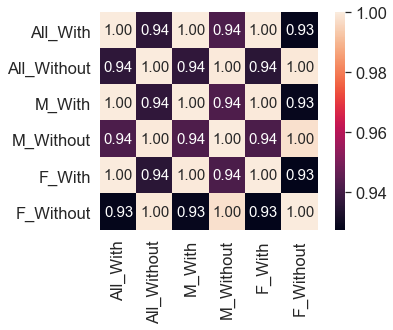

In [34]:
cm = np.corrcoef(train_set_prepared[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15},
                 yticklabels=cols, xticklabels=cols)
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression

# This function plots graph, saves them and returns model parameters, R2 scores of the function fitted

### Note ####
# Dependencies required: SciencePlots
def graphingtool(X,y,xlabel_="",ylabel_="",legend1="",legend2="", title_ = None):
    lr = LinearRegression()
    X = X.reshape(-1,1)
    lr.fit(X,y)
    
#     plt.style.use(['science','ieee','no-latex','grid'])
#     plt.scatter(X,y,s=2)
#     plt.plot(X,lr.predict(X),'r',)
#     plt.xlabel(xlabel_)
#     plt.ylabel(ylabel_)
#     if title_:
#         plt.title(title_)
#     plt.legend([legend1,legend2])
#     filename = xlabel_ + '_' + ylabel_
#     plt.savefig(filename)
#     plt.close()
    m = lr.coef_[0]
    c = lr.intercept_
    return [m,c],lr.score(X,y)
    


In [35]:
# Soft Learning Example of Linear Regression 
# a is the true slope of the data and c is the true intercept
# e is like simulated noise obtained from a gaussian distribution
c = 1; sigma = 20; a = 5
e = np.random.normal(0,sigma,100)
x = np.linspace(-2,50,100)
y = a*x + c + e 

In [36]:
graphingtool(x,y,xlabel_ = "x",ylabel_ = 'y',legend1 = 'Line of Best fit',legend2 = 'data',title_ = 'Linear Regression')

([4.800835050662803, 9.79975520594708], 0.9207516812979113)

The a_estimate and c_estimate are obtained via OLS Method and the plot (in pdf) seems a good fit

In [37]:
# Graphs:
xcols = {'Med_Income':'Median Income',
         'Med_Income_White':'Median Income White',
         'Med_Income_Black':'Median Income Black',
         'Med_Income_Nat_Am': 'Median Income Native Americans',
         'Med_Income_Asian':'Median Income Asian',
         'Hispanic':'Median Income Hispanic',
         'M_Poverty_Percentage':'Male Poverty (in Percent)',
         'F_Poverty_Percentage':'Female Poverty (in Percent)',
         'All_Poverty_Percentage':'Combined Poverty (in Percent)',
         'M_With_Percentage':'Male with insurance (in percent)',
         'F_With_Percentage':'Female with insurance (in percent)',
         'All_With_Percentage':'All with insurance (in percent)'         
        } 

ycols = ['Incidence_Rate','Mortality_Rate']

In [38]:
model_estimates = {}

for xcol,val in xcols.items():
    for ycol in ycols:
        x1 = dataset_prepared[xcol]
        y1 = dataset_prepared[ycol]
        y1 = y1[x1.notnull()]
        x1 = x1[x1.notnull()]
        data = " ".join(ycol.split('_'))
        [li,score] = graphingtool(x1.values,y1.values,xlabel_ = val,ylabel_ = data,legend1 = 'Linear Fit',
                     legend2 = data)
        model_estimates[xcol+'_'+ycol] = [li,score]    

In [42]:
#################################
# Median Income vs Incidence Rate
#################################
li = []
for key,val in model_estimates.items():
    if ('Med_Income' in key or 'Hispanic' in key) and 'Incidence_Rate' in key: 
        x = np.linspace(20000,140000)
        y = model_estimates[key][0][0]*x + model_estimates[key][0][1]
        plt.style.use(['science','grid','nature','no-latex'])
        plt.plot(x,y)
        data = key
        temp = data.split('_')
        temp = temp[:-2]
        data  = "_".join(temp)
        li.append(xcols[data])
plt.xlabel('Median Income')
plt.ylabel('Incidence Rate')
plt.legend(li,prop={'size': 3})
plt.title('Median Income vs Incidence Rate')
plt.savefig('Median Income vs Incidence Rate')
plt.close()
        
    

In [43]:
#################################
# Median Income vs Mortality Rate
#################################

li = []
for key,val in model_estimates.items():
    if ('Med_Income' in key or 'Hispanic' in key) and 'Mortality_Rate' in key: 
        x = np.linspace(10000,100000)
        y = model_estimates[key][0][0]*x + model_estimates[key][0][1]
        plt.style.use(['science','grid','nature','no-latex'])
        plt.plot(x,y)
        data = key
        temp = data.split('_')
        temp = temp[:-2]
        data  = "_".join(temp)
        li.append(xcols[data])
plt.xlabel('Median Income')
plt.ylabel('Mortality Rate')
plt.legend(li,prop={'size': 3})
plt.title('Median Income vs Mortality Rate')
plt.savefig('Median Income vs Mortality Rate')
plt.close()

In [44]:
#################################
# Poverty vs Incidence Rate
#################################

li = []
for key,val in model_estimates.items():
    if 'Poverty' in key and 'Incidence_Rate' in key: 
        x = np.linspace(5,70)
        y = model_estimates[key][0][0]*x + model_estimates[key][0][1]
        plt.style.use(['science','grid','nature','no-latex'])
        plt.plot(x,y)
        data = key
        temp = data.split('_')
        temp = temp[:-2]
        data  = "_".join(temp)
        li.append(xcols[data])
plt.xlabel('Poverty in Percentage')
plt.ylabel('Incidence Rate')
plt.legend(li,prop={'size': 5})
plt.title('Poverty vs Incidence Rate')
plt.savefig('Poverty vs Incidence Rate')
plt.close()

In [45]:
#################################
# Poverty vs Mortality Rate
#################################

li = []
for key,val in model_estimates.items():
    if 'Poverty' in key and 'Mortality_Rate' in key: 
        x = np.linspace(5,70)
        y = model_estimates[key][0][0]*x + model_estimates[key][0][1]
        plt.style.use(['science','grid','nature','no-latex'])
        plt.plot(x,y)
        data = key
        temp = data.split('_')
        temp = temp[:-2]
        data  = "_".join(temp)
        li.append(xcols[data])
plt.xlabel('Poverty in Percentage')
plt.ylabel('Mortality Rate')
plt.legend(li,prop={'size': 5})
plt.title('Poverty vs Mortality Rate')
plt.savefig('Poverty vs Mortality Rate')
plt.close()

In [39]:
#################################
# Health Insurance vs Incidence Rate
#################################
li = []
for key,val in model_estimates.items():
    if 'With' in key and 'Incidence_Rate' in key: 
        x = np.linspace(0,50)
        y = model_estimates[key][0][0]*x + model_estimates[key][0][1]
        plt.style.use(['science','grid','nature','no-latex'])
        plt.plot(x,y)
        data = key
        temp = data.split('_')
        temp = temp[:-2]
        data  = "_".join(temp)
        li.append(xcols[data])
plt.xlabel('People Insured (in Percent)')
plt.ylabel('Incidence Rate')
plt.legend(li,prop={'size': 5})
plt.title('Health Insurance vs Incidence Rate')
plt.savefig('Health Insurance vs Incidence Rate')
plt.close()

In [40]:
#################################
# Health Insurance vs Mortality Rate
#################################
li = []
for key,val in model_estimates.items():
    if 'With' in key and 'Mortality_Rate' in key: 
        x = np.linspace(0,50)
        y = model_estimates[key][0][0]*x + model_estimates[key][0][1]
        plt.style.use(['science','grid','nature','no-latex'])
        plt.plot(x,y)
        data = key
        temp = data.split('_')
        temp = temp[:-2]
        data  = "_".join(temp)
        li.append(xcols[data])
plt.xlabel('People Insured (in Percent)')
plt.ylabel('Mortality Rate')
plt.legend(li,prop={'size': 5})
plt.title('Health Insurance vs Mortality Rate')
plt.savefig('Health Insurance vs Mortality Rate')
plt.close()